<a href="https://colab.research.google.com/github/Akshay2224/Apparent-Temperature/blob/master/Apparent_Temp_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <u><h1 style='font-size:45px; text-align:center'><font color =white>Apparent   </font><font color = white>    Temperature </font></h1></u>

##<u>What is Apparent Temperature ?</u>
####Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind #### speed. The measure is most commonly applied to the perceived outdoor temperature.In simple words ,It is the temperature that it feels like to our body because of other weather variables other than temperature. This is generally higher in case of high humidity.          

##<u>Project Statement</u>

####This project is a programming assignment wherein you have to make an EDA report to analyse the factors affecting the apparent temperature given other weather variables in an hourly manner.

In [0]:
#Importing necessary Libraries
import pandas as pd #used for opening file 
import numpy as np #for linear Algebra
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization

In [0]:
#Opening a File by read_csv function under pandas library
df=pd.read_csv('https://github.com/Akshay2224/Apparent-Temperature/raw/master/weather_data.csv')

In [221]:
#lets look towards the number of rows and columns in the datset
df.shape

(5999, 12)

####So it looks from the above analysis that we are having 5999 rows and 12 columns

##<u>Data Description</u>
#### The data set contains 6000 entries with 12 columns listing various environment variables and text descriptions. The CSV file includes an hourly/daily  summary for Szeged, Hungary area, between 2006 and 2008. 

###<u>Szeged,Hungary</u>
####Szeged is the third largest city of Hungary, the largest city and regional centre of the Southern Great Plain and the county seat of Csongrád county. The University of Szeged is one of the most distinguished universities in Hungary.Szeged is the third-most-populous city / town of Hungary by population (168,048)
![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Szeged%2C_Tisza_river_bank%2C_with_Mora_Museum%2C_and_the_Theatre_building.jpg/1920px-Szeged%2C_Tisza_river_bank%2C_with_Mora_Museum%2C_and_the_Theatre_building.jpg)

###<u>Attribute Description</u>
#### 1. time -Time at which the observation is recorded
#### 2. summary -It describes the summary of the weather
#### 3. precipType -It describes the form of precipitation
#### 4. temperature -it describes the actual tempertaure that was recorded at that time .It is calculated in degree celsius.
#### 5. apparentTemperature -It describes the apparent temperature that was calculated at that time..It is calculated in degree celsius.
#### 6. humidity -It describes the Humidity.
#### 7. windSpeed-It desribes the windspeed..It is calculated in Kilometres/hour,
#### 8. windBearing- It describes the degree toward which the wind is blowing.
#### 9. visibility-It descibes the distance upto which it is visible by a naked eye.It is calculated in Kilometres.
#### 10.loudCover-It describes the cloud cover.
#### 11. pressure-It describes about the pressure .It is calculated in Milibars.

In [222]:
#Lets head toward looking of first five rows of datasets.
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


##<u>Some Stats about the Data</u>

In [223]:
#To get the name of columns in the dataset.
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [224]:
#To get a description about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),5999.0,10.217695,10.565425,-14.088889,1.094444,10.0500,18.722222,34.005556
Apparent Temperature (C),5999.0,8.958658,11.923712,-22.094444,-1.538889,10.0500,18.722222,36.400000
Humidity,5999.0,0.779488,0.173051,0.270000,0.680000,0.8300,0.920000,1.000000
Wind Speed (km/h),5999.0,10.007362,6.536619,0.000000,4.878300,9.0643,13.395200,45.933300
Wind Bearing (degrees),5999.0,190.349558,107.026792,0.000000,122.000000,190.0000,287.000000,359.000000
Visibility (km),5999.0,9.476875,4.038583,0.000000,6.906900,9.9820,11.270000,16.100000
Loud Cover,5999.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),5999.0,997.359828,145.173638,0.000000,1012.060000,1016.8400,1022.490000,1045.140000


####It is visible from the data that count is equal to number of rows.average temperature at Szeged is nearly eqaul to 10 degree celsius.We can also see that that maximum temperature which was recorded in szeged was 34 and minimun temperature was -14 degree celsius.

####It is can be seen from above analysis that maximum wind speed is 46(approx.) km/hr whereas 10 km/hr is the minimum wind speed.

In [225]:
#To find the median values from the every columns of dataset.
df.median()

Temperature (C)               10.0500
Apparent Temperature (C)      10.0500
Humidity                       0.8300
Wind Speed (km/h)              9.0643
Wind Bearing (degrees)       190.0000
Visibility (km)                9.9820
Loud Cover                     0.0000
Pressure (millibars)        1016.8400
dtype: float64

####From the above analysis we can see that the mean and the median of the columns are nearly equal which means the data has less very skewness.

##<u>Data Quality</u>

####<u>Missing Values</u>

In [226]:
#To check the missing values in the dataset
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

####So it is visible from the above data that there is no null data in any row of the column

###<u>Datatypes used</u>

In [227]:
#To check the datatypes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
Formatted Date              5999 non-null object
Summary                     5999 non-null object
Precip Type                 5999 non-null object
Temperature (C)             5999 non-null float64
Apparent Temperature (C)    5999 non-null float64
Humidity                    5999 non-null float64
Wind Speed (km/h)           5999 non-null float64
Wind Bearing (degrees)      5999 non-null int64
Visibility (km)             5999 non-null float64
Loud Cover                  5999 non-null int64
Pressure (millibars)        5999 non-null float64
Daily Summary               5999 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


####So from above analysis we can see that there are 6 float type columns ,2 int type columns and 4 object type columns

###<u>Unique Values in Columns</u>

In [228]:
#To check the number of unique values in each columns of dataset
df.apply( lambda x: len(x.unique()))

Formatted Date              5999
Summary                       14
Precip Type                    2
Temperature (C)             3014
Apparent Temperature (C)    3622
Humidity                      74
Wind Speed (km/h)           1444
Wind Bearing (degrees)       357
Visibility (km)              592
Loud Cover                     1
Pressure (millibars)        2637
Daily Summary                 58
dtype: int64

####So it is visible from above data that there are 2 types of precip_type and one cloud cover

##<u>Univariate Analysis</u>

###<u>Summary</u>

In [229]:
#To get a description about the column summary.
df['Summary'].describe()

count              5999
unique               14
top       Partly Cloudy
freq               1791
Name: Summary, dtype: object

Here we can see that that there are 14 unique values and maximum frequency is of Partly Cloudy

####To count the number of times a value has appeared in column Summary.

In [230]:
df3=df.groupby('Summary').size()
print(df3)

Summary
Breezy and Foggy               7
Breezy and Mostly Cloudy      20
Breezy and Overcast           25
Breezy and Partly Cloudy       7
Clear                        853
Foggy                        576
Humid and Mostly Cloudy        6
Humid and Partly Cloudy        3
Mostly Cloudy               1473
Overcast                    1230
Partly Cloudy               1791
Windy and Foggy                2
Windy and Overcast             4
Windy and Partly Cloudy        2
dtype: int64


So we can see that that most of times the weather is Partly Cloudy and Mostly Cloudy.

([<matplotlib.patches.Wedge at 0x7f75643dea58>,
 [Text(0.7886369354169925, 0.7668453456180683, 'Mostly Cloudy'),
  Text(-0.8683896512248944, 0.6752032387700065, 'Overcast'),
  Text(-0.6653832115436118, -0.8759367453166406, 'Partly Cloudy'),
  Text(0.7756760300546007, -0.7799530090965315, 'Rest')],
 [Text(0.43016560113654134, 0.41827927942803717, '24.6%'),
  Text(-0.473667082486306, 0.3682926756927308, '29.9%'),
  Text(-0.36293629720560644, -0.4777836792636221, '20.5%'),
  Text(0.42309601639341854, -0.42542891405265354, '25.1%')])

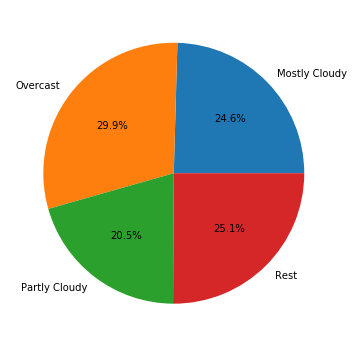

In [231]:
df3=df3.to_frame()
p=df3.query('Summary=="Clear"') 
p2 =df3.query('Summary=="Foggy"')
p3=df3.query('Summary=="Windy and Foggy"') 
p4 =df3.query('Summary=="Windy and Overcast"')
p5=df3.query('Summary=="Windy and Partly Cloudy"') 
p6 =df3.query('Summary=="Humid and Partly Cloudy"')
p7=df3.query('Summary=="Humid and Mostly Cloudy"') 
p8 =df3.query('Summary=="Breezy and Partly Cloudy"')
p9=df3.query('Summary=="Breezy and Overcast"') 
p10 =df3.query('Summary=="Breezy and Mostly Cloudy"')
p11=df3.query('Summary=="Breezy and Foggy"')
p12=df3.query('Summary=="Partly Cloudy"')
p13=df3.query('Summary=="Mostly Cloudy"')
p14=df3.query('Summary=="Overcast"')
p1=p2.sum()+p.sum()+p3.sum()+p4.sum()+p5.sum()+p6.sum()+p7.sum()+p8.sum()+p9.sum()+p10.sum()+p11.sum()
p14=p14.sum()
p12=p12.sum()
p13=p13.sum()
from matplotlib.pyplot import pie, axis, show
df12 = pd.DataFrame({
    'Summary': ['Partly Cloudy', 'Mostly Cloudy', 'Overcast','Rest'],
    'Values': [p14,p13,p12,p1]})
sums = df12.Values.groupby(df12.Summary).sum()
plt.figure(figsize=(28,6))
axis='equal'
pie(sums, labels=sums.index,autopct='%1.1f%%')

####Here We can see that approximate 75% of the Summary consists of only Overacast,Partly Cloudy,Mostly Cloudy.These is because Szeged is a city with a significant rainfall. Even in the driest month there is a lot of rain.


###<u>Precip_Type</u>

In [232]:
#To get the Description about the Precipitation Type 
df['Precip Type'].describe()

count     5999
unique       2
top       rain
freq      4762
Name: Precip Type, dtype: object

####Here we can see that there are only 2 types of unique Values in which rain is top value.

In [236]:
percentage=df['Precip Type'].value_counts()
percent=100*(percentage/df['Precip Type'].value_counts().sum())
percent

rain    79.379897
snow    20.620103
Name: Precip Type, dtype: float64

####Here We can see that approx. 79% times rain happenend and 21% time Snow happenend

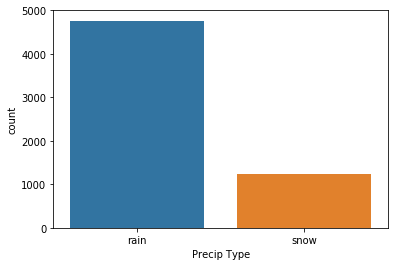

In [241]:
sns.countplot(df['Precip Type'])

####We can see that rain occurs most of Time.